In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.5
L = 20
T = 18

In [3]:
init_func = lambda x: np.sin(4 * np.pi * x / L)

In [4]:
def generate_grid(start, stop, step):
    return np.arange(start, stop + 0.0001, step)

In [5]:
x0 = generate_grid(0, L, h)

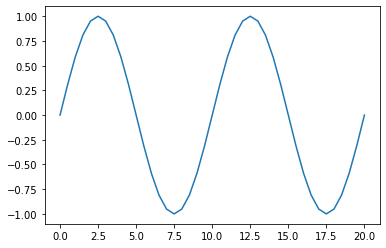

In [6]:
y0 = [init_func(x) for x in x0]
plt.plot(x0, y0)

In [7]:
def corner(y_prev, n, cfl):
    y_next = np.zeros(n + 1)
    y_next[0] = 0
    for i in range(1, n + 1):
        y_next[i] = y_prev[i] - cfl * (y_prev[i] - y_prev[i-1])
    y_next[0] = y_next[-1]
    return y_next

In [8]:
lv_lam = lambda l, c, r, cfl: c - cfl / 2 * (r - l) + cfl**2 / 2 * (r - 2*c + l)

In [9]:
def lv(y_prev, n, cfl):
    y_next = np.zeros(n + 1)
    y_next[0] = 0
    for i in range(1, n):
        y_next[i] = lv_lam(y_prev[i-1], y_prev[i], y_prev[i+1], cfl)
    y_next[-1] = lv_lam(y_prev[-2], y_prev[-1], y_prev[0], cfl)
    y_next[0] = lv_lam(y_prev[-1], y_prev[0], y_prev[1], cfl)
    return y_next

In [10]:
def solve(func, start, stop, step, CFL, time, method=lv, show=True, dt_output=1):
    x0 = generate_grid(start, stop, step)
    y0 = [func(x) for x in x0]

    t = 0
    next_output = t + dt_output
    n = int((stop - start) / step)
    tau = CFL * step

    y = y0.copy()
    print('CFL = {}'.format(CFL))
    while (t < time):
        y = method(y, n, CFL)
        # print('Time = {}'.format(t))
        # print('Next output = {}'.format(next_output))

        if t >= next_output:
            if show:
                plt.figure()
                plt.plot(x0, y, label='t = {:.1f}'.format(t))
                plt.legend(loc='upper left')

                next_output += dt_output
        t += tau

    return x0, y

In [15]:
h = 0.5
L = 20
T = 18
cfl = 2

CFL = 2


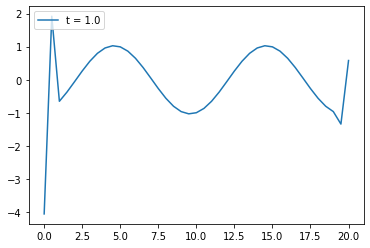

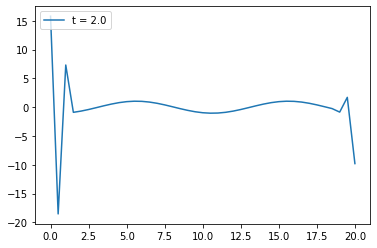

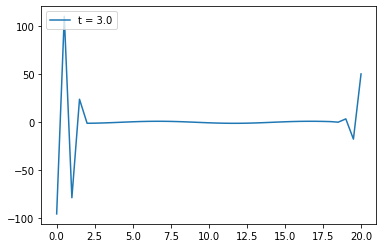

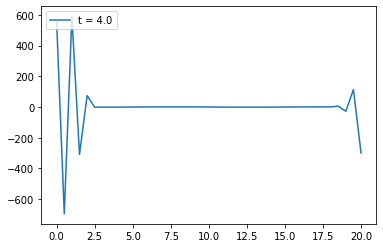

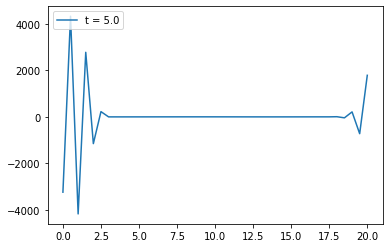

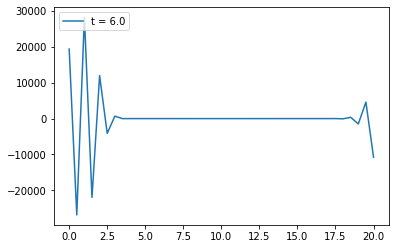

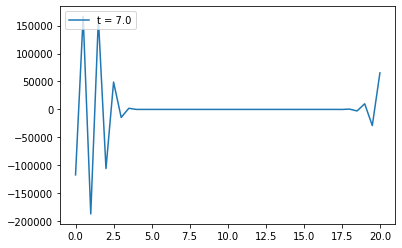

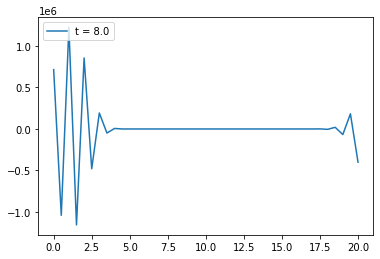

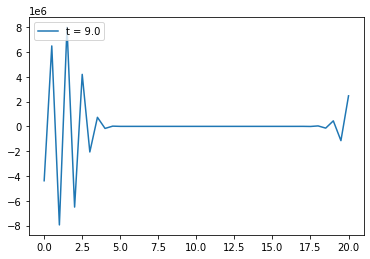

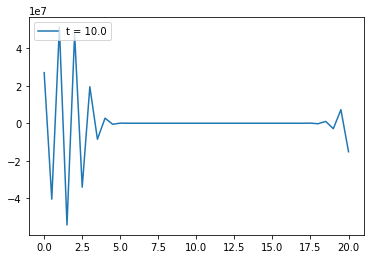

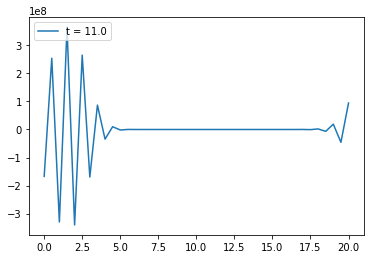

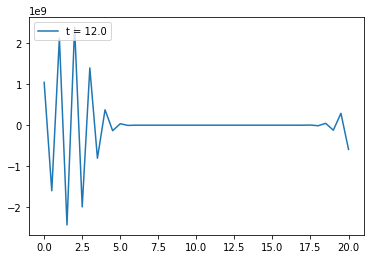

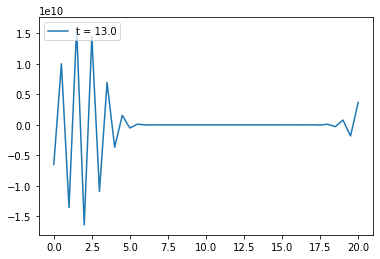

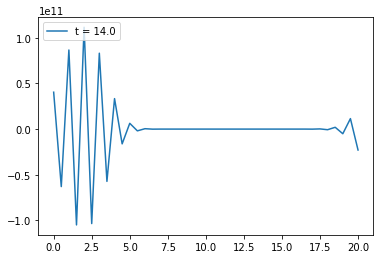

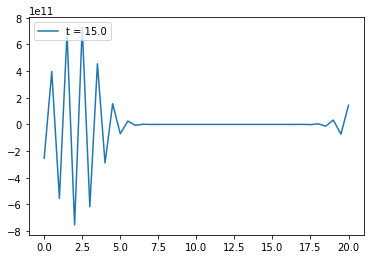

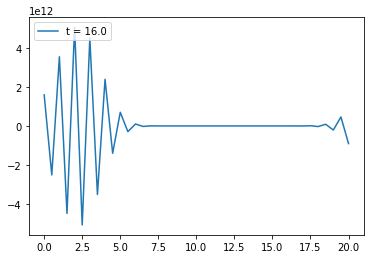

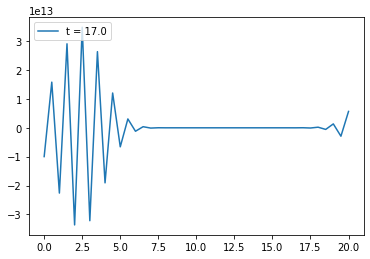

In [16]:
x, y = solve(init_func, 0, L, h, cfl, T, method=lv)

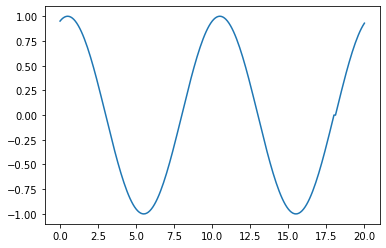

In [44]:
plt.plot(x, y)